# **Import And Install Necessary Libraries**

In [ ]:
!pip install lightgbm
!pip install fbprophet

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV

import lightgbm as lgb
from prophet import Prophet

import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns

# **Load the Dataset**

In [ ]:
energy = pd.read_excel('/content/ikitelli-gune-enerjisi-santrali-elektrik-uretim-miktarlar.xlsx')

In [ ]:
energy

,Tarih,Üretim (kWh)
0,2018-05-01 04:55:00,0.0
1,2018-05-01 05:00:00,0.0
2,2018-05-01 05:15:00,0.0
3,2018-05-01 05:30:00,0.0
4,2018-05-01 05:45:00,0.0
...,...,...
1930,2018-05-31 19:45:00,7.0
1931,2018-05-31 20:00:00,1.0
1932,2018-05-31 20:15:00,0.0
1933,2018-05-31 20:30:00,0.0


## **Convert csv Format**

***The data set is in xlsx format, let's convert it to csv format.***

In [ ]:
energy.to_csv('solar_energy.csv')

In [ ]:
df = pd.read_csv('/content/solar_energy.csv')

# **Understand And Organize the Dataset**

In [ ]:
df

,Unnamed: 0,Tarih,Üretim (kWh)
0,0,2018-05-01 04:55:00,0.0
1,1,2018-05-01 05:00:00,0.0
2,2,2018-05-01 05:15:00,0.0
3,3,2018-05-01 05:30:00,0.0
4,4,2018-05-01 05:45:00,0.0
...,...,...,...
1930,1930,2018-05-31 19:45:00,7.0
1931,1931,2018-05-31 20:00:00,1.0
1932,1932,2018-05-31 20:15:00,0.0
1933,1933,2018-05-31 20:30:00,0.0


In [ ]:
df = df[['Tarih', 'Üretim (kWh)']]

In [ ]:
df

,Tarih,Üretim (kWh)
0,2018-05-01 04:55:00,0.0
1,2018-05-01 05:00:00,0.0
2,2018-05-01 05:15:00,0.0
3,2018-05-01 05:30:00,0.0
4,2018-05-01 05:45:00,0.0
...,...,...
1930,2018-05-31 19:45:00,7.0
1931,2018-05-31 20:00:00,1.0
1932,2018-05-31 20:15:00,0.0
1933,2018-05-31 20:30:00,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tarih         1935 non-null   object 
 1   Üretim (kWh)  1935 non-null   float64
dtypes: float64(1), object(1)
memory usage: 30.4+ KB


***Column names are Turkish, let's translate them into English so everyone can understand them.***

In [ ]:
df.columns=['Date', 'Production (kWh)']

In [ ]:
df

,Date,Production (kWh)
0,2018-05-01 04:55:00,0.0
1,2018-05-01 05:00:00,0.0
2,2018-05-01 05:15:00,0.0
3,2018-05-01 05:30:00,0.0
4,2018-05-01 05:45:00,0.0
...,...,...
1930,2018-05-31 19:45:00,7.0
1931,2018-05-31 20:00:00,1.0
1932,2018-05-31 20:15:00,0.0
1933,2018-05-31 20:30:00,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1935 non-null   object 
 1   Production (kWh)  1935 non-null   float64
dtypes: float64(1), object(1)
memory usage: 30.4+ KB


***Date column's Dtype is object but we need to convert it to datetime Dtype***

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-116-b9c6864122be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1935 non-null   datetime64[ns]
 1   Production (kWh)  1935 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 30.4 KB


In [ ]:
df['Time'] = df['Date'].dt.time

In [ ]:
df

,Date,Production (kWh),Time
0,2018-05-01 04:55:00,0.0,04:55:00
1,2018-05-01 05:00:00,0.0,05:00:00
2,2018-05-01 05:15:00,0.0,05:15:00
3,2018-05-01 05:30:00,0.0,05:30:00
4,2018-05-01 05:45:00,0.0,05:45:00
...,...,...,...
1930,2018-05-31 19:45:00,7.0,19:45:00
1931,2018-05-31 20:00:00,1.0,20:00:00
1932,2018-05-31 20:15:00,0.0,20:15:00
1933,2018-05-31 20:30:00,0.0,20:30:00


***Visualization of İkitelli Solar Power Plant May 2018 Production (Period: 15 min)***

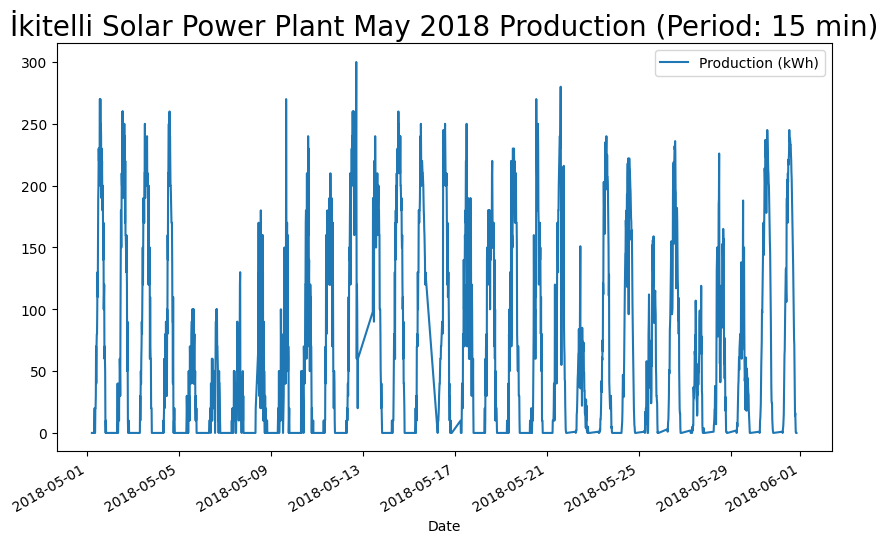

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('İkitelli Solar Power Plant May 2018 Production (Period: 15 min)',fontsize=20)
ax = df.plot.line(x='Date',y='Production (kWh)',ax=ax)

In [ ]:
df['Day'] = df['Date'].dt.day

In [ ]:
df

,Date,Production (kWh),Time,Day
0,2018-05-01 04:55:00,0.0,04:55:00,1
1,2018-05-01 05:00:00,0.0,05:00:00,1
2,2018-05-01 05:15:00,0.0,05:15:00,1
3,2018-05-01 05:30:00,0.0,05:30:00,1
4,2018-05-01 05:45:00,0.0,05:45:00,1
...,...,...,...,...
1930,2018-05-31 19:45:00,7.0,19:45:00,31
1931,2018-05-31 20:00:00,1.0,20:00:00,31
1932,2018-05-31 20:15:00,0.0,20:15:00,31
1933,2018-05-31 20:30:00,0.0,20:30:00,31


***To find out how much energy is produced on average per day, create a new column called Production_Day_Mean with groupby method***

In [ ]:
day_mean_prod = df.groupby('Day')['Production (kWh)'].mean().reset_index().rename(columns={'Production (kWh)':'Production_Day_Mean'})

In [ ]:
day_mean_prod.head()

,Day,Production_Day_Mean
0,1,92.753623
1,2,83.382353
2,3,98.115942
3,4,75.507246
4,5,27.826087


In [ ]:
df = df.merge(day_mean_prod, on='Day')

In [ ]:
df

,Date,Production (kWh),Time,Day,Production_Day_Mean
0,2018-05-01 04:55:00,0.0,04:55:00,1,92.753623
1,2018-05-01 05:00:00,0.0,05:00:00,1,92.753623
2,2018-05-01 05:15:00,0.0,05:15:00,1,92.753623
3,2018-05-01 05:30:00,0.0,05:30:00,1,92.753623
4,2018-05-01 05:45:00,0.0,05:45:00,1,92.753623
...,...,...,...,...,...
1930,2018-05-31 19:45:00,7.0,19:45:00,31,122.916833
1931,2018-05-31 20:00:00,1.0,20:00:00,31,122.916833
1932,2018-05-31 20:15:00,0.0,20:15:00,31,122.916833
1933,2018-05-31 20:30:00,0.0,20:30:00,31,122.916833


***Visualization of İkitelli Solar Power Plant May 2018 Production (Period: 1 Day)***

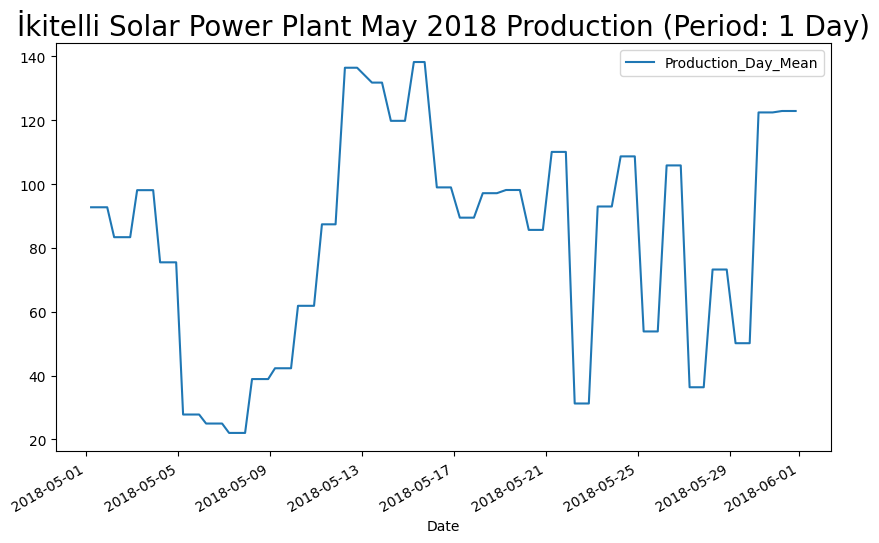

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('İkitelli Solar Power Plant May 2018 Production (Period: 1 Day)',fontsize=20)
ax = df.plot.line(x='Date',y='Production_Day_Mean',ax=ax)

# **Generating New Features for Model Building**

In [ ]:
df['Hour'] = df['Date'].dt.hour
df['Day of Week'] = df['Date'].dt.day_of_week
df['Minute'] = df['Date'].dt.minute

In [ ]:
df

,Date,Production (kWh),Time,Day,Production_Day_Mean,Hour,Day of Week,Minute
0,2018-05-01 04:55:00,0.0,04:55:00,1,92.753623,4,1,55
1,2018-05-01 05:00:00,0.0,05:00:00,1,92.753623,5,1,0
2,2018-05-01 05:15:00,0.0,05:15:00,1,92.753623,5,1,15
3,2018-05-01 05:30:00,0.0,05:30:00,1,92.753623,5,1,30
4,2018-05-01 05:45:00,0.0,05:45:00,1,92.753623,5,1,45
...,...,...,...,...,...,...,...,...
1930,2018-05-31 19:45:00,7.0,19:45:00,31,122.916833,19,3,45
1931,2018-05-31 20:00:00,1.0,20:00:00,31,122.916833,20,3,0
1932,2018-05-31 20:15:00,0.0,20:15:00,31,122.916833,20,3,15
1933,2018-05-31 20:30:00,0.0,20:30:00,31,122.916833,20,3,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1935 non-null   datetime64[ns]
 1   Production (kWh)     1935 non-null   float64       
 2   Time                 1935 non-null   object        
 3   Day                  1935 non-null   int32         
 4   Production_Day_Mean  1935 non-null   float64       
 5   Hour                 1935 non-null   int32         
 6   Day of Week          1935 non-null   int32         
 7   Minute               1935 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(4), object(1)
memory usage: 90.8+ KB


## **Generating New Weather Features**

In [ ]:
import requests
import pandas as pd

# API informations
api_key = "5a587d22da4d43af822200737252301" # Use your api key
location = "istanbul"
start_date = "2018-05-01"
end_date = "2018-05-31"
frequency = "1"  # Daily data (24 hours)

base_url = "http://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": api_key,
    "q": location,
    "format": "json",
    "date": start_date,
    "enddate": end_date,
    "tp": frequency,
}

In [ ]:
# Send API request
response = requests.get(base_url, params=params)

if response.status_code == 200:
    data = response.json()
    weather_data = data["data"]["weather"]

    # Convert JSON data to pandas DataFrame
    records = []
    for day in weather_data:
        for hour in day["hourly"]:
            # Creating the time in the correct format
            hour_time = hour['time']

            # If the time information is a value such as "0" or "100", convert it to the appropriate format
            if hour_time == "0":
                hour_time = "00:00"
            elif len(hour_time) == 1:
                hour_time = f"0{hour_time}:00"
            elif len(hour_time) == 2:
                hour_time = f"{hour_time}:00"
            elif len(hour_time) == 3:
                hour_time = f"0{hour_time[0]}:{hour_time[1:]}"
            elif len(hour_time) == 4:
                hour_time = f"{hour_time[:2]}:{hour_time[2:]}"

            date_time_str = f"{day['date']} {hour_time}"
            date_time = pd.to_datetime(date_time_str, format='%Y-%m-%d %H:%M')


            records.append({
                "date_time": date_time,
                "maxtempC": day["maxtempC"],
                "mintempC": day["mintempC"],
                "sunHour": day["sunHour"],
                "uvIndex": hour.get("uvIndex", None),
                "cloudcover": hour.get("cloudcover", None),
                "tempC": hour.get("tempC", None),
                "FeelsLikeC": hour.get("FeelsLikeC", None),
                "humidity": hour.get("humidity", None),
                "windSpeedKmph": hour.get("windspeedKmph", None),
                "precipMM": hour.get("precipMM", None),
                "weatherDesc": hour.get("weatherDesc", [{}])[0].get("value", None),  # Weather description
            })

    # Convert data to DataFrame
    weather_df = pd.DataFrame(records)

    # Save as CSV
    weather_df.to_csv("istanbul_weather_may_2018.csv", index=False)
    print("Data was successfully pulled and saved to CSV.")
    print(weather_df.head()) # View sample data
else:
    print(f"API request failed. Error code: {response.status_code}")

Data was successfully pulled and saved to CSV.
            date_time maxtempC mintempC sunHour uvIndex cloudcover tempC  \
0 2018-05-01 00:00:00       19       13    14.0       1         24    14   
1 2018-05-01 01:00:00       19       13    14.0       1         29    14   
2 2018-05-01 02:00:00       19       13    14.0       1         35    14   
3 2018-05-01 03:00:00       19       13    14.0       1         40    14   
4 2018-05-01 04:00:00       19       13    14.0       1         29    14   

  FeelsLikeC humidity windSpeedKmph precipMM    weatherDesc  
0         14       90             7      0.0          Clear  
1         14       90             7      0.0  Partly cloudy  
2         13       91             6      0.0  Partly cloudy  
3         14       91             6      0.0  Partly cloudy  
4         14       88             6      0.0  Partly cloudy  


In [ ]:
weather_df

,date_time,maxtempC,mintempC,sunHour,uvIndex,cloudcover,tempC,FeelsLikeC,humidity,windSpeedKmph,precipMM,weatherDesc
0,2018-05-01 00:00:00,19,13,14.0,1,24,14,14,90,7,0.0,Clear
1,2018-05-01 01:00:00,19,13,14.0,1,29,14,14,90,7,0.0,Partly cloudy
2,2018-05-01 02:00:00,19,13,14.0,1,35,14,13,91,6,0.0,Partly cloudy
3,2018-05-01 03:00:00,19,13,14.0,1,40,14,14,91,6,0.0,Partly cloudy
4,2018-05-01 04:00:00,19,13,14.0,1,29,14,14,88,6,0.0,Partly cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...
739,2018-05-31 19:00:00,23,18,15.0,1,20,20,20,66,13,0.0,Clear
740,2018-05-31 20:00:00,23,18,15.0,1,32,19,19,67,11,0.0,Partly cloudy
741,2018-05-31 21:00:00,23,18,15.0,1,44,19,19,69,10,0.0,Partly cloudy
742,2018-05-31 22:00:00,23,18,15.0,1,55,19,19,69,10,0.0,Partly cloudy


In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date_time      744 non-null    datetime64[ns]
 1   maxtempC       744 non-null    object        
 2   mintempC       744 non-null    object        
 3   sunHour        744 non-null    object        
 4   uvIndex        744 non-null    object        
 5   cloudcover     744 non-null    object        
 6   tempC          744 non-null    object        
 7   FeelsLikeC     744 non-null    object        
 8   humidity       744 non-null    object        
 9   windSpeedKmph  744 non-null    object        
 10  precipMM       744 non-null    object        
 11  weatherDesc    744 non-null    object        
dtypes: datetime64[ns](1), object(11)
memory usage: 69.9+ KB


# **Preprocessing Columns**

In [ ]:
weather_df = weather_df.drop(columns=['uvIndex1', 'uvIndex'], errors='ignore')

In [ ]:
weather_df

,date_time,maxtempC,mintempC,sunHour,cloudcover,tempC,FeelsLikeC,humidity,windSpeedKmph,precipMM,weatherDesc
0,2018-05-01 00:00:00,19,13,14.0,24,14,14,90,7,0.0,Clear
1,2018-05-01 01:00:00,19,13,14.0,29,14,14,90,7,0.0,Partly cloudy
2,2018-05-01 02:00:00,19,13,14.0,35,14,13,91,6,0.0,Partly cloudy
3,2018-05-01 03:00:00,19,13,14.0,40,14,14,91,6,0.0,Partly cloudy
4,2018-05-01 04:00:00,19,13,14.0,29,14,14,88,6,0.0,Partly cloudy
...,...,...,...,...,...,...,...,...,...,...,...
739,2018-05-31 19:00:00,23,18,15.0,20,20,20,66,13,0.0,Clear
740,2018-05-31 20:00:00,23,18,15.0,32,19,19,67,11,0.0,Partly cloudy
741,2018-05-31 21:00:00,23,18,15.0,44,19,19,69,10,0.0,Partly cloudy
742,2018-05-31 22:00:00,23,18,15.0,55,19,19,69,10,0.0,Partly cloudy


In [ ]:
weather_df['date_time'] = pd.to_datetime(weather_df['date_time'])

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date_time      744 non-null    datetime64[ns]
 1   maxtempC       744 non-null    object        
 2   mintempC       744 non-null    object        
 3   sunHour        744 non-null    object        
 4   cloudcover     744 non-null    object        
 5   tempC          744 non-null    object        
 6   FeelsLikeC     744 non-null    object        
 7   humidity       744 non-null    object        
 8   windSpeedKmph  744 non-null    object        
 9   precipMM       744 non-null    object        
 10  weatherDesc    744 non-null    object        
dtypes: datetime64[ns](1), object(10)
memory usage: 64.1+ KB


In [ ]:
weather_df

,date_time,maxtempC,mintempC,sunHour,cloudcover,tempC,FeelsLikeC,humidity,windSpeedKmph,precipMM,weatherDesc
0,2018-05-01 00:00:00,19,13,14.0,24,14,14,90,7,0.0,Clear
1,2018-05-01 01:00:00,19,13,14.0,29,14,14,90,7,0.0,Partly cloudy
2,2018-05-01 02:00:00,19,13,14.0,35,14,13,91,6,0.0,Partly cloudy
3,2018-05-01 03:00:00,19,13,14.0,40,14,14,91,6,0.0,Partly cloudy
4,2018-05-01 04:00:00,19,13,14.0,29,14,14,88,6,0.0,Partly cloudy
...,...,...,...,...,...,...,...,...,...,...,...
739,2018-05-31 19:00:00,23,18,15.0,20,20,20,66,13,0.0,Clear
740,2018-05-31 20:00:00,23,18,15.0,32,19,19,67,11,0.0,Partly cloudy
741,2018-05-31 21:00:00,23,18,15.0,44,19,19,69,10,0.0,Partly cloudy
742,2018-05-31 22:00:00,23,18,15.0,55,19,19,69,10,0.0,Partly cloudy


In [ ]:
weather_df['precipMM'].unique()

array(['0.0', '0.5', '1.2', '0.8', '1.1', '0.4', '0.9', '0.2', '0.1',
       '0.3', '0.7', '2.2', '3.2', '3.4', '3.0', '0.6', '1.7', '1.5',
       '1.0', '2.1', '4.1', '3.6', '1.4', '2.0', '1.3', '2.4'],
      dtype=object)

***Convert Columns to Numeric Data***

In [ ]:
weather_df['maxtempC'] = pd.to_numeric(weather_df['maxtempC'])
weather_df['mintempC'] = pd.to_numeric(weather_df['mintempC'])
weather_df['sunHour'] = pd.to_numeric(weather_df['sunHour'])
weather_df['cloudcover'] = pd.to_numeric(weather_df['cloudcover'])
weather_df['tempC'] = pd.to_numeric(weather_df['tempC'])
weather_df['FeelsLikeC'] = pd.to_numeric(weather_df['FeelsLikeC'])
weather_df['humidity'] = pd.to_numeric(weather_df['humidity'])
weather_df['windSpeedKmph'] = pd.to_numeric(weather_df['windSpeedKmph'])
weather_df['precipMM'] = pd.to_numeric(weather_df['precipMM'])

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date_time      744 non-null    datetime64[ns]
 1   maxtempC       744 non-null    int64         
 2   mintempC       744 non-null    int64         
 3   sunHour        744 non-null    float64       
 4   cloudcover     744 non-null    int64         
 5   tempC          744 non-null    int64         
 6   FeelsLikeC     744 non-null    int64         
 7   humidity       744 non-null    int64         
 8   windSpeedKmph  744 non-null    int64         
 9   precipMM       744 non-null    float64       
 10  weatherDesc    744 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(7), object(1)
memory usage: 64.1+ KB


***Label Encoding for Categorical Column***

In [ ]:
weather_df['weatherDesc'].unique()

array(['Clear', 'Partly cloudy', 'Sunny', 'Cloudy', 'Overcast',
       'Moderate rain at times', 'Heavy rain at times',
       'Patchy rain possible', 'Moderate or heavy rain shower'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
weather_df['weatherDesc'] = le.fit_transform(weather_df['weatherDesc'])

In [ ]:
weather_df

,date_time,maxtempC,mintempC,sunHour,cloudcover,tempC,FeelsLikeC,humidity,windSpeedKmph,precipMM,weatherDesc
0,2018-05-01 00:00:00,19,13,14.0,24,14,14,90,7,0.0,0
1,2018-05-01 01:00:00,19,13,14.0,29,14,14,90,7,0.0,6
2,2018-05-01 02:00:00,19,13,14.0,35,14,13,91,6,0.0,6
3,2018-05-01 03:00:00,19,13,14.0,40,14,14,91,6,0.0,6
4,2018-05-01 04:00:00,19,13,14.0,29,14,14,88,6,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...
739,2018-05-31 19:00:00,23,18,15.0,20,20,20,66,13,0.0,0
740,2018-05-31 20:00:00,23,18,15.0,32,19,19,67,11,0.0,6
741,2018-05-31 21:00:00,23,18,15.0,44,19,19,69,10,0.0,6
742,2018-05-31 22:00:00,23,18,15.0,55,19,19,69,10,0.0,6


In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date_time      744 non-null    datetime64[ns]
 1   maxtempC       744 non-null    int64         
 2   mintempC       744 non-null    int64         
 3   sunHour        744 non-null    float64       
 4   cloudcover     744 non-null    int64         
 5   tempC          744 non-null    int64         
 6   FeelsLikeC     744 non-null    int64         
 7   humidity       744 non-null    int64         
 8   windSpeedKmph  744 non-null    int64         
 9   precipMM       744 non-null    float64       
 10  weatherDesc    744 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 64.1 KB


# **Merge Datasets**

***Now let's merge the df and weather_df datasets. To merge, let's create two new columns named Day and Hour with the datetime column in weather_df and merge these 2 columns with the common column Day and Hour in df.***

In [ ]:
weather_df['Day'] = weather_df['date_time'].dt.day
weather_df['Hour'] = weather_df['date_time'].dt.hour

In [ ]:
weather_df

,date_time,maxtempC,mintempC,sunHour,cloudcover,tempC,FeelsLikeC,humidity,windSpeedKmph,precipMM,weatherDesc,Day,Hour
0,2018-05-01 00:00:00,19,13,14.0,24,14,14,90,7,0.0,0,1,0
1,2018-05-01 01:00:00,19,13,14.0,29,14,14,90,7,0.0,6,1,1
2,2018-05-01 02:00:00,19,13,14.0,35,14,13,91,6,0.0,6,1,2
3,2018-05-01 03:00:00,19,13,14.0,40,14,14,91,6,0.0,6,1,3
4,2018-05-01 04:00:00,19,13,14.0,29,14,14,88,6,0.0,6,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2018-05-31 19:00:00,23,18,15.0,20,20,20,66,13,0.0,0,31,19
740,2018-05-31 20:00:00,23,18,15.0,32,19,19,67,11,0.0,6,31,20
741,2018-05-31 21:00:00,23,18,15.0,44,19,19,69,10,0.0,6,31,21
742,2018-05-31 22:00:00,23,18,15.0,55,19,19,69,10,0.0,6,31,22


In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date_time      744 non-null    datetime64[ns]
 1   maxtempC       744 non-null    int64         
 2   mintempC       744 non-null    int64         
 3   sunHour        744 non-null    float64       
 4   cloudcover     744 non-null    int64         
 5   tempC          744 non-null    int64         
 6   FeelsLikeC     744 non-null    int64         
 7   humidity       744 non-null    int64         
 8   windSpeedKmph  744 non-null    int64         
 9   precipMM       744 non-null    float64       
 10  weatherDesc    744 non-null    int64         
 11  Day            744 non-null    int32         
 12  Hour           744 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(8)
memory usage: 69.9 KB


In [ ]:
merged_df = pd.merge(df, weather_df, on=['Day', 'Hour'], how='left').drop_duplicates('Date').reset_index(drop=True)

In [ ]:
merged_df

,Date,Production (kWh),Time,Day,Production_Day_Mean,Hour,Day of Week,Minute,date_time,maxtempC,mintempC,sunHour,cloudcover,tempC,FeelsLikeC,humidity,windSpeedKmph,precipMM,weatherDesc
0,2018-05-01 04:55:00,0.0,04:55:00,1,92.753623,4,1,55,2018-05-01 04:00:00,19,13,14.0,29,14,14,88,6,0.0,6
1,2018-05-01 05:00:00,0.0,05:00:00,1,92.753623,5,1,0,2018-05-01 05:00:00,19,13,14.0,18,14,14,85,7,0.0,0
2,2018-05-01 05:15:00,0.0,05:15:00,1,92.753623,5,1,15,2018-05-01 05:00:00,19,13,14.0,18,14,14,85,7,0.0,0
3,2018-05-01 05:30:00,0.0,05:30:00,1,92.753623,5,1,30,2018-05-01 05:00:00,19,13,14.0,18,14,14,85,7,0.0,0
4,2018-05-01 05:45:00,0.0,05:45:00,1,92.753623,5,1,45,2018-05-01 05:00:00,19,13,14.0,18,14,14,85,7,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,2018-05-31 19:45:00,7.0,19:45:00,31,122.916833,19,3,45,2018-05-31 19:00:00,23,18,15.0,20,20,20,66,13,0.0,0
1931,2018-05-31 20:00:00,1.0,20:00:00,31,122.916833,20,3,0,2018-05-31 20:00:00,23,18,15.0,32,19,19,67,11,0.0,6
1932,2018-05-31 20:15:00,0.0,20:15:00,31,122.916833,20,3,15,2018-05-31 20:00:00,23,18,15.0,32,19,19,67,11,0.0,6
1933,2018-05-31 20:30:00,0.0,20:30:00,31,122.916833,20,3,30,2018-05-31 20:00:00,23,18,15.0,32,19,19,67,11,0.0,6


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1935 non-null   datetime64[ns]
 1   Production (kWh)     1935 non-null   float64       
 2   Time                 1935 non-null   object        
 3   Day                  1935 non-null   int32         
 4   Production_Day_Mean  1935 non-null   float64       
 5   Hour                 1935 non-null   int32         
 6   Day of Week          1935 non-null   int32         
 7   Minute               1935 non-null   int32         
 8   date_time            1935 non-null   datetime64[ns]
 9   maxtempC             1935 non-null   int64         
 10  mintempC             1935 non-null   int64         
 11  sunHour              1935 non-null   float64       
 12  cloudcover           1935 non-null   int64         
 13  tempC                1935 non-nul

# **Visualization of the Relationships Between Some Features and Production_Day_Mean**

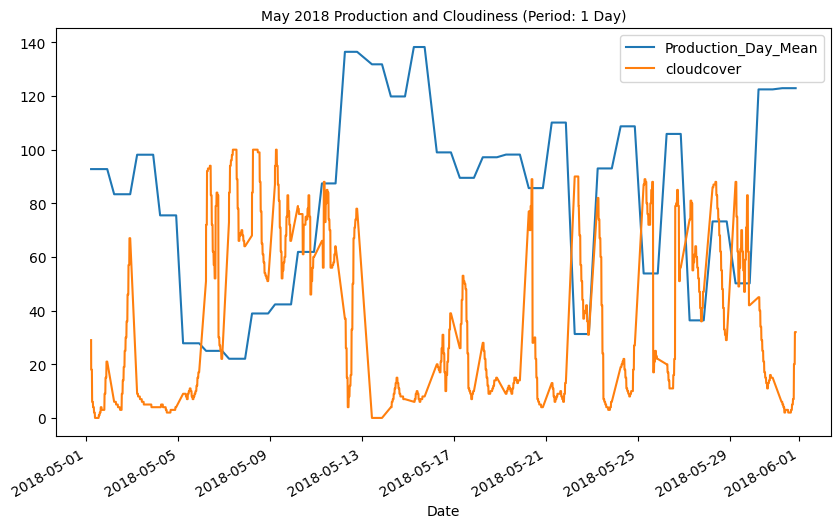

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('May 2018 Production and Cloudiness (Period: 1 Day)',fontsize=10)
ax = merged_df.plot.line(x='Date',y=['Production_Day_Mean','cloudcover'],ax=ax)

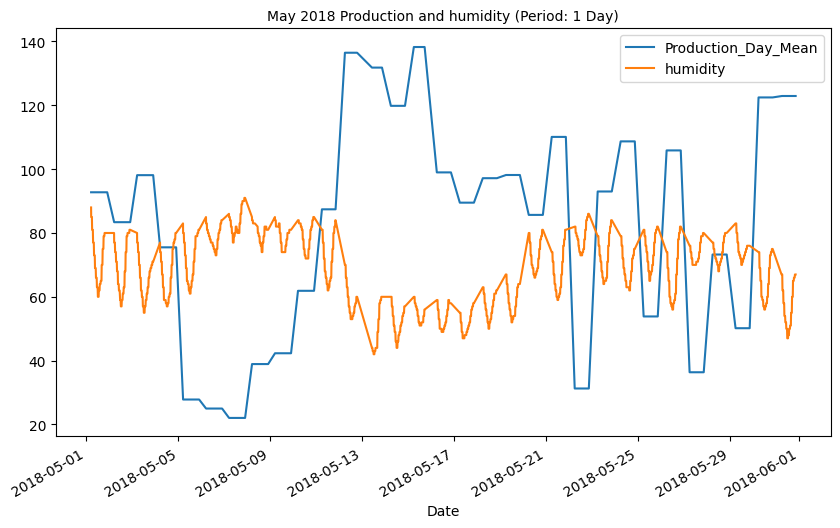

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('May 2018 Production and humidity (Period: 1 Day)',fontsize=10)
ax = merged_df.plot.line(x='Date',y=['Production_Day_Mean','humidity'],ax=ax)

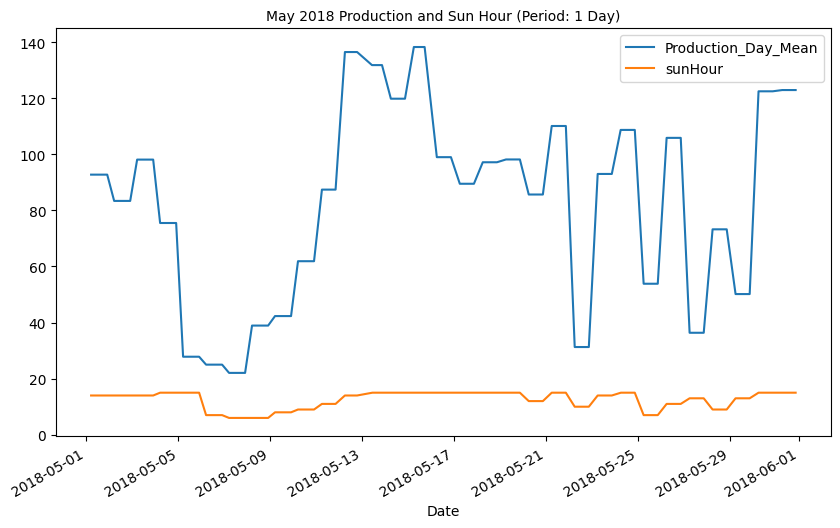

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('May 2018 Production and Sun Hour (Period: 1 Day)',fontsize=10)
ax = merged_df.plot.line(x='Date',y=['Production_Day_Mean','sunHour'],ax=ax)

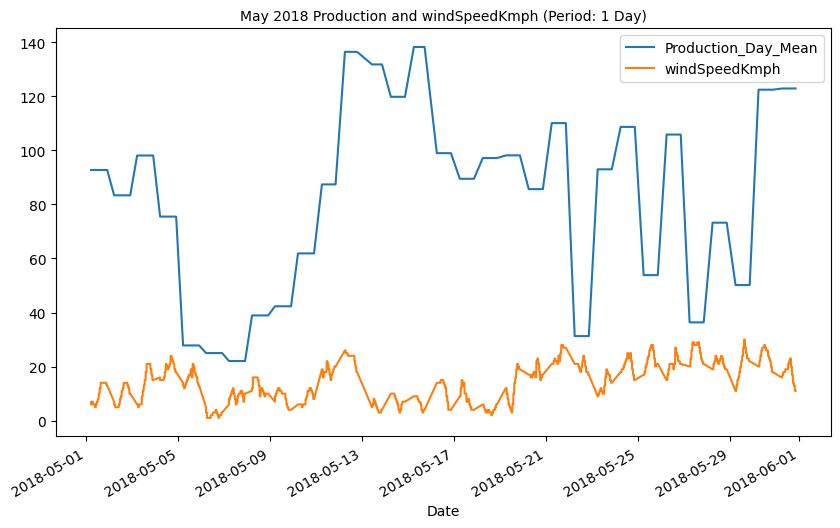

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('May 2018 Production and windSpeedKmph (Period: 1 Day)',fontsize=10)
ax = merged_df.plot.line(x='Date',y=['Production_Day_Mean','windSpeedKmph'],ax=ax)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1935 non-null   datetime64[ns]
 1   Production (kWh)     1935 non-null   float64       
 2   Time                 1935 non-null   object        
 3   Day                  1935 non-null   int32         
 4   Production_Day_Mean  1935 non-null   float64       
 5   Hour                 1935 non-null   int32         
 6   Day of Week          1935 non-null   int32         
 7   Minute               1935 non-null   int32         
 8   date_time            1935 non-null   datetime64[ns]
 9   maxtempC             1935 non-null   int64         
 10  mintempC             1935 non-null   int64         
 11  sunHour              1935 non-null   float64       
 12  cloudcover           1935 non-null   int64         
 13  tempC                1935 non-nul

# **Models Building**

***Determine the values ​​of x and y variables***

In [ ]:
x = merged_df[['Minute', 'Day', 'Hour', 'Day of Week','maxtempC', 'mintempC', 'sunHour', 'cloudcover', 'tempC', 'FeelsLikeC', 'humidity', 'windSpeedKmph', 'precipMM', 'weatherDesc']]
y = merged_df['Production (kWh)']

## **Modeling with LightGBM**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=False, test_size=24*4*2)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1743, 14), (192, 14), (1743,), (192,))

In [ ]:
params = {
    'max_depth':3,
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['mape','rmse'],
    'num_leaves': 5,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

In [ ]:
train_data = lgb.Dataset(x_train, y_train)
test_data = lgb.Dataset(x_test, y_test, reference=train_data)

In [ ]:
model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, test_data],
    valid_names=['train', 'test'],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[80]	train's mape: 3.48062	train's rmse: 34.595	test's mape: 2.83947	test's rmse: 30.795


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(x_test) # Get the model's predictions

# Evaluate using regression metrics:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 948.3319
Root Mean Squared Error (RMSE): 30.7950
Mean Absolute Error (MAE): 25.5306
R-squared (R2): 0.8568


### **Comparing Actual and Predicted Values with LightGBM Model**

In [ ]:
full_train = lgb.Dataset(x_train,y_train)

In [ ]:
model = lgb.train(params,full_train,num_boost_round=50,callbacks=[lgb.log_evaluation(10)])

In [ ]:
result = pd.DataFrame()

In [ ]:
result['Date'] = df.iloc[len(x_train):]['Date'].values
result['Predicted'] = model.predict(x_test)
result['Actual'] = y_test.values

In [ ]:
result

,Date,Predicted,Actual
0,2018-05-28 18:00:00,39.004790,75.0
1,2018-05-28 18:15:00,38.156500,46.0
2,2018-05-28 18:30:00,38.156500,18.0
3,2018-05-28 18:45:00,38.156500,29.0
4,2018-05-28 19:00:00,20.473147,11.0
...,...,...,...
187,2018-05-31 19:45:00,25.088548,7.0
188,2018-05-31 20:00:00,25.163656,1.0
189,2018-05-31 20:15:00,24.315367,0.0
190,2018-05-31 20:30:00,24.315367,0.0


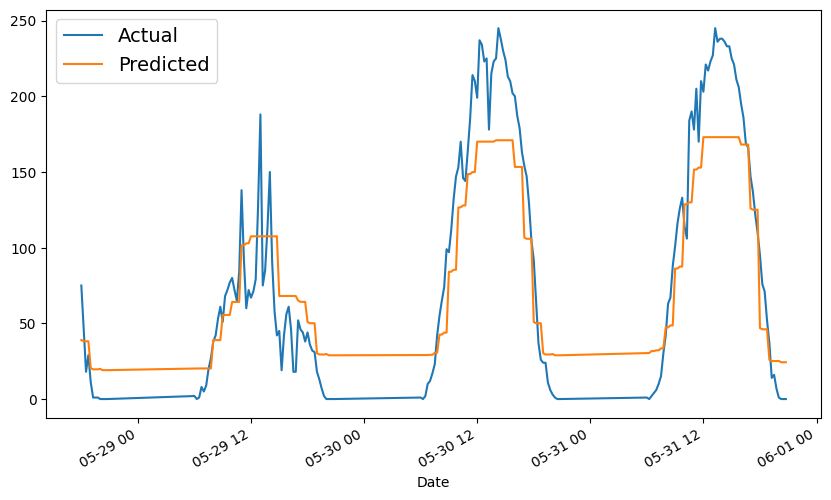

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

result.plot.line(x='Date',y=['Actual','Predicted'],ax=ax)
ax.legend(prop=dict(size=14))

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

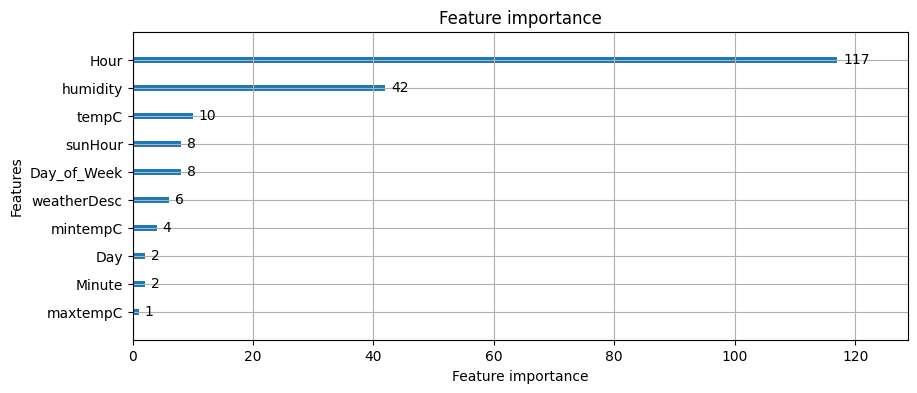

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))

lgb.plot_importance(model,ax=ax)

## **Modelling with Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x = merged_df[['Minute', 'Day', 'Day of Week', 'Hour', 'maxtempC', 'mintempC', 'sunHour', 'cloudcover', 'tempC', 'FeelsLikeC', 'humidity', 'windSpeedKmph', 'precipMM', 'weatherDesc']]
y = merged_df['Production (kWh)']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size=0.8)

In [ ]:
rf = RandomForestRegressor(n_estimators=600,random_state=42)
model_rf = rf.fit(x_train, y_train)

In [ ]:
model_rf.score(x_test, y_test)

0.8633616944326997

### **Comparing Actual and Predicted Values with Random Forest Regressor**

***I preferred to visualize the comparison of the model with the highest score, that is, the Random Forest Regression Model.***

In [ ]:
result_rf = pd.DataFrame()
result_rf['Date'] = merged_df.iloc[len(x_train):]['Date'].values
result_rf['Predicted'] = model_rf.predict(x_test)
result_rf['Actual'] = y_test.values

In [ ]:
result_rf

,Date,Predicted,Actual
0,2018-05-25 14:00:00,0.000000,0.0
1,2018-05-25 14:15:00,229.025000,220.0
2,2018-05-25 14:30:00,220.065000,240.0
3,2018-05-25 14:45:00,0.003333,0.0
4,2018-05-25 15:00:00,40.283133,38.0
...,...,...,...
382,2018-05-31 19:45:00,121.205167,154.0
383,2018-05-31 20:00:00,215.898217,225.0
384,2018-05-31 20:15:00,40.858333,52.0
385,2018-05-31 20:30:00,123.501667,70.0


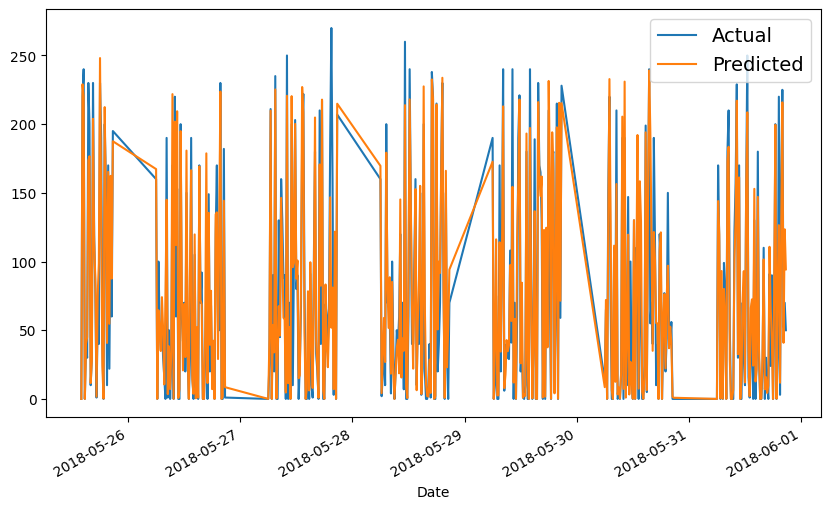

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

result_rf.plot.line(x='Date',y=['Actual','Predicted'],ax=ax)
ax.legend(prop=dict(size=14))

## **Modelling with Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
model_lr = lr.fit(x_train, y_train)

In [ ]:
model_lr.score(x_test, y_test)

0.6367263655521109

## **Modelling with XGB Regressor**

In [ ]:
import xgboost as xgb

In [ ]:
boost = xgb.XGBRegressor()
model_xgb = boost.fit(x_train, y_train)

In [ ]:
model_xgb.score(x_test, y_test)

0.8565562765290341

# **Model Building Using MinMaxScaller And OneHotEncoder**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
onehot = OneHotEncoder()
merged_df['Minute'] = onehot.fit_transform(merged_df[['Minute']]).toarray()
merged_df['Hour'] = onehot.fit_transform(merged_df[['Hour']]).toarray()
merged_df['Day'] = onehot.fit_transform(merged_df[['Day']]).toarray()
merged_df['Day of Week'] = onehot.fit_transform(merged_df[['Day of Week']]).toarray()

In [ ]:
scaler = MinMaxScaler()
merged_df['maxtempC'] = scaler.fit_transform(merged_df[['maxtempC']])
merged_df['mintempC'] = scaler.fit_transform(merged_df[['mintempC']])
merged_df['sunHour'] = scaler.fit_transform(merged_df[['sunHour']])
merged_df['cloudcover'] = scaler.fit_transform(merged_df[['cloudcover']])
merged_df['tempC'] = scaler.fit_transform(merged_df[['tempC']])
merged_df['FeelsLikeC'] = scaler.fit_transform(merged_df[['FeelsLikeC']])
merged_df['humidity'] = scaler.fit_transform(merged_df[['humidity']])
merged_df['windSpeedKmph'] = scaler.fit_transform(merged_df[['windSpeedKmph']])
merged_df['precipMM'] = scaler.fit_transform(merged_df[['precipMM']])

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1935 non-null   datetime64[ns]
 1   Production (kWh)     1935 non-null   float64       
 2   Time                 1935 non-null   object        
 3   Day                  1935 non-null   float64       
 4   Production_Day_Mean  1935 non-null   float64       
 5   Hour                 1935 non-null   float64       
 6   Day of Week          1935 non-null   float64       
 7   Minute               1935 non-null   float64       
 8   date_time            1935 non-null   datetime64[ns]
 9   maxtempC             1935 non-null   float64       
 10  mintempC             1935 non-null   float64       
 11  sunHour              1935 non-null   float64       
 12  cloudcover           1935 non-null   float64       
 13  tempC                1935 non-nul

In [ ]:
x = merged_df[['Minute', 'Day', 'Day of Week', 'Hour', 'maxtempC', 'mintempC', 'sunHour', 'cloudcover', 'tempC', 'FeelsLikeC', 'humidity', 'windSpeedKmph', 'precipMM', 'weatherDesc']]
y = merged_df['Production (kWh)']

In [ ]:
lr = RandomForestRegressor(n_estimators=600,random_state=42)
model_lr = lr.fit(x_train, y_train)
model_lr.score(x_test, y_test)

0.8633616944326997

In [ ]:
lm = LinearRegression()
model_lm = lm.fit(x_train, y_train)
model_lm.score(x_test, y_test)

0.6367263655521109

In [ ]:
boost = xgb.XGBRegressor()
model_xgb = boost.fit(x_train, y_train)
model_xgb.score(x_test, y_test)

0.8565562765290341

***Nothing has changed :)***

## **Using GridSearchCV**

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


grid_search = GridSearchCV(
    estimator=lgb.LGBMRegressor(objective='regression', metric=['mape', 'rmse']),
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

# Best parameters and model
print("Best Parameters: ", grid_search.best_params_)
print("Best R² score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Set MAE (Mean Absolute Error): {mae:.2f}")
print(f"Test Set R² Score: {r2:.2f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}
Best R² score:  0.8693710114718641
Test Set MAE (Mean Absolute Error): 19.61
Test Set R² Score: 0.86


In [ ]:
best_result_lgbm = pd.DataFrame()

In [ ]:
best_result_lgbm['Date'] = merged_df.iloc[len(x_train):]['Date'].values
best_result_lgbm['Predicted'] = best_model.predict(x_test)
best_result_lgbm['Actual'] = y_test.values

In [ ]:
best_result_lgbm

,Date,Predicted,Actual
0,2018-05-25 14:00:00,-2.905809,0.0
1,2018-05-25 14:15:00,239.727609,220.0
2,2018-05-25 14:30:00,214.571920,240.0
3,2018-05-25 14:45:00,5.135085,0.0
4,2018-05-25 15:00:00,26.425047,38.0
...,...,...,...
382,2018-05-31 19:45:00,117.721696,154.0
383,2018-05-31 20:00:00,231.230680,225.0
384,2018-05-31 20:15:00,44.955644,52.0
385,2018-05-31 20:30:00,131.076420,70.0


### **Comparing Actual and Predicted Values After Label Encoding and Min Max Scaling**

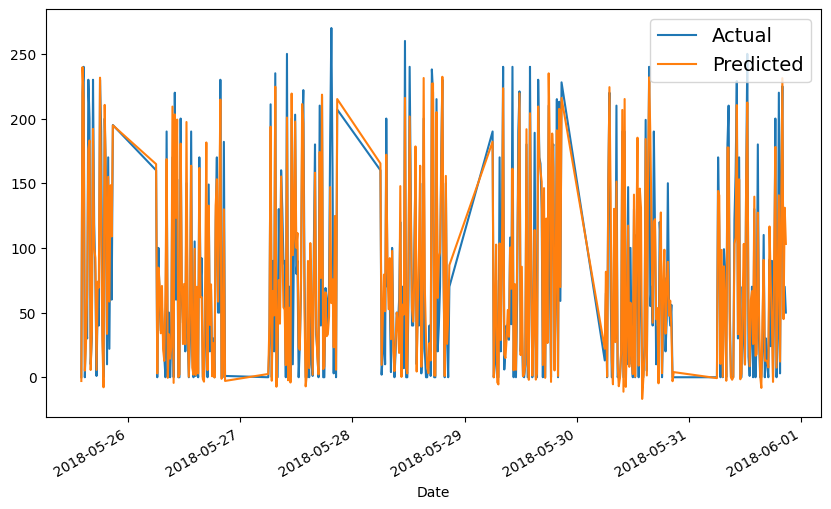

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

best_result_lgbm.plot.line(x='Date',y=['Actual','Predicted'],ax=ax)
ax.legend(prop=dict(size=14))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


rf = RandomForestRegressor(random_state=42)

grid_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=grid_params, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

# Best parameters and model
grid_best_model = grid_search.best_estimator_
print("Best Parameters: ", grid_search.best_params_)

# Predictions and model performance
y_pred = grid_best_model.predict(x_test)
print("Mean Squared Error (MSE): ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Mean Squared Error (MSE):  824.4874596012262
R2 Score:  0.8644110671548526


In [ ]:
best_result_rf = pd.DataFrame()

In [ ]:
best_result_rf['Date'] = merged_df.iloc[len(x_train):]['Date'].values
best_result_rf['Predicted'] = grid_best_model.predict(x_test)
best_result_rf['Actual'] = y_test.values

In [ ]:
best_result_rf

,Date,Predicted,Actual
0,2018-05-25 14:00:00,0.000000,0.0
1,2018-05-25 14:15:00,230.852504,220.0
2,2018-05-25 14:30:00,219.208877,240.0
3,2018-05-25 14:45:00,0.000000,0.0
4,2018-05-25 15:00:00,34.833700,38.0
...,...,...,...
382,2018-05-31 19:45:00,117.334612,154.0
383,2018-05-31 20:00:00,213.339069,225.0
384,2018-05-31 20:15:00,43.556423,52.0
385,2018-05-31 20:30:00,123.170955,70.0


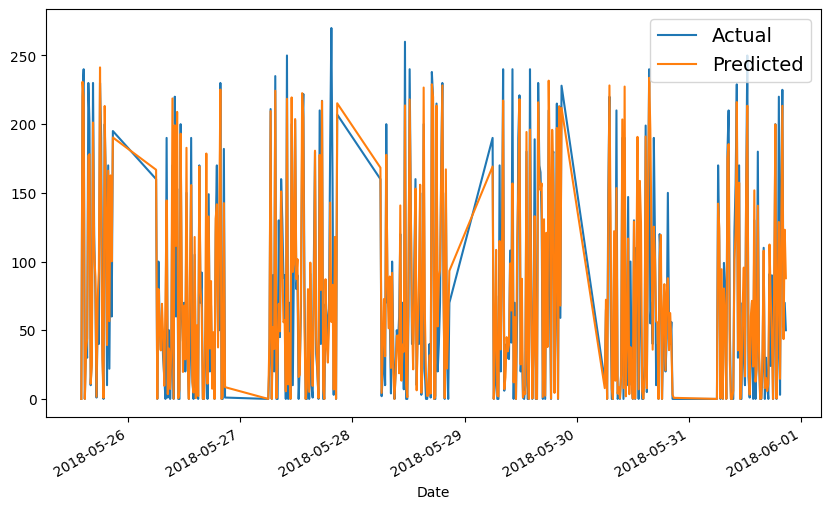

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

best_result_rf.plot.line(x='Date',y=['Actual','Predicted'],ax=ax)
ax.legend(prop=dict(size=14))

# **Forecast for Next 72 Hours Using FBProphet**

In [ ]:
df_prophet = merged_df[["Date", "Production (kWh)"]].rename(columns={"Date": "ds", "Production (kWh)": "y"})

In [ ]:
df_prophet.head()

,ds,y
0,2018-05-01 04:55:00,0.0
1,2018-05-01 05:00:00,0.0
2,2018-05-01 05:15:00,0.0
3,2018-05-01 05:30:00,0.0
4,2018-05-01 05:45:00,0.0


In [ ]:
model_pro = Prophet()

In [ ]:
model_pro.fit(df_prophet)
future = model_pro.make_future_dataframe(periods=72, freq="H")
forecast = model_pro.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5n7ktb2k/mljfes26.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5n7ktb2k/44q2i49m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3722', 'data', 'file=/tmp/tmp5n7ktb2k/mljfes26.json', 'init=/tmp/tmp5n7ktb2k/44q2i49m.json', 'output', 'file=/tmp/tmp5n7ktb2k/prophet_model5b9ssmyk/prophet_model-20250125205219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:52:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:52:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version,

In [ ]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
2002,2018-06-03 16:45:00,120.795681,64.800818,174.427202
2003,2018-06-03 17:45:00,77.801261,23.933084,132.751976
2004,2018-06-03 18:45:00,36.568975,-19.649488,88.643381
2005,2018-06-03 19:45:00,12.716826,-44.540537,66.021007
2006,2018-06-03 20:45:00,14.685074,-39.486942,71.963936


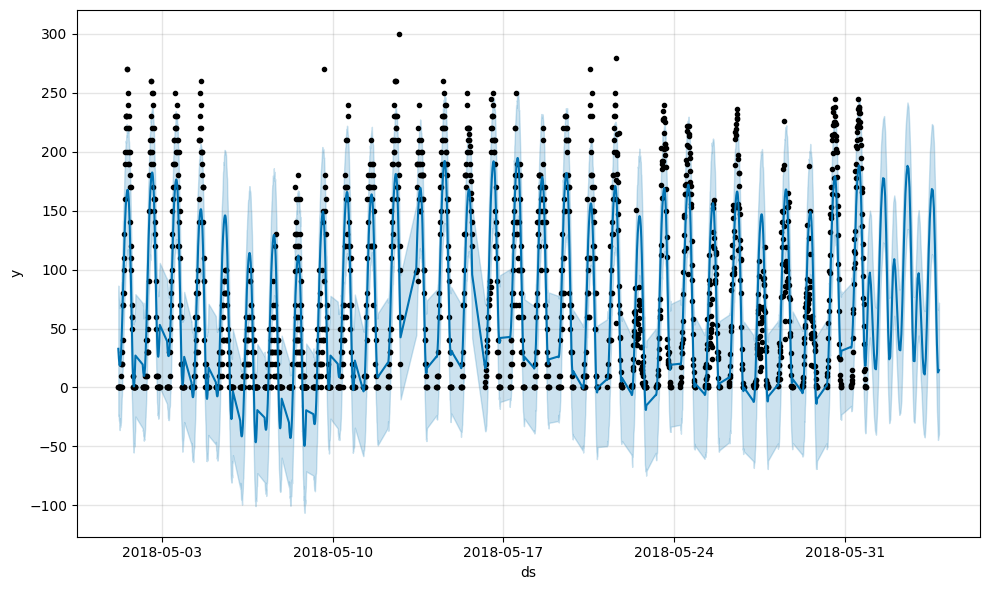

In [ ]:
model_pro.plot(forecast);

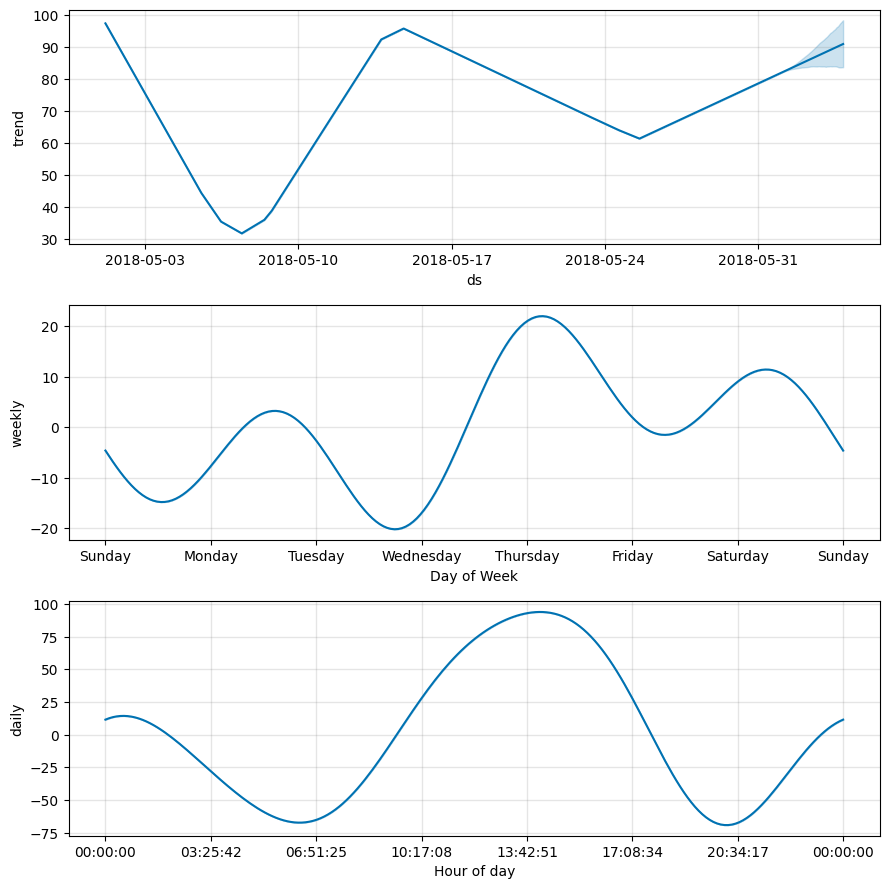

In [ ]:
model_pro.plot_components(forecast);

# **Correlation Heatmap**

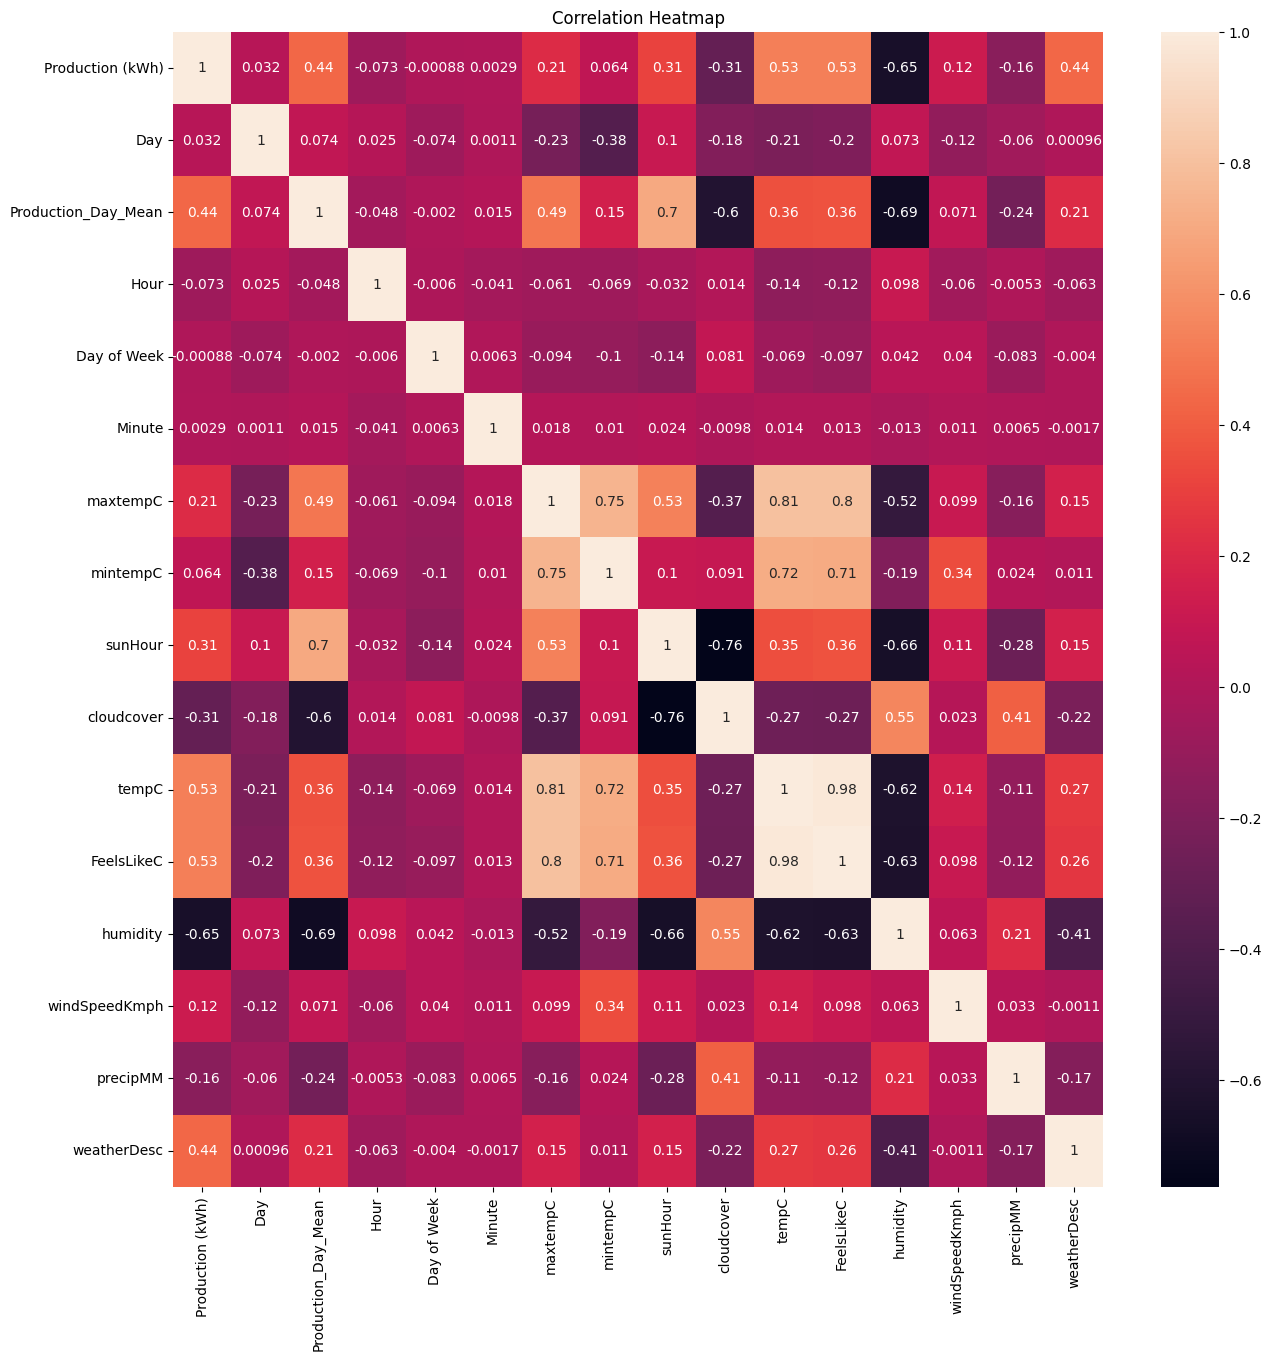

In [ ]:
# Select only numerical features for correlation calculation
numerical_features = merged_df.select_dtypes(include=['number', 'bool']).columns
correlation_matrix = merged_df[numerical_features].corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

# **Conclusion**

***It is a project that shows the relationships between a data set called İkitelli Solar Power Plant Electricity Production Amounts, prepared by the Istanbul Buyuksehir Belediyesi (Metropolitan Municipality) and realized in May 2018, with the weather conditions of that day and includes some machine learning models. I tried to search for the best model and made it predict the next 72 hours using FBProphet. I found the best model score to be 86.4. And some features, especially humidity and cloudiness values, were made analyzable by plotting the relationship between them and Production_Day_Mean and visualizing them with the Correlation Heatmap.***